
### Data Cleaning and Preparation


At first we read the totaldemand_nsw data and understand the data also look for any missing values. 

In [97]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Total demand NSW data

In [98]:
#read totaldemand_nsw.csv data
totaldemand_nsw = pd.read_csv('../data/totaldemand_nsw.csv')
totaldemand_nsw.head()

,DATETIME,TOTALDEMAND,REGIONID
0,1/1/2010 0:00,8038.00,NSW1
1,1/1/2010 0:30,7809.31,NSW1
2,1/1/2010 1:00,7483.69,NSW1
3,1/1/2010 1:30,7117.23,NSW1
4,1/1/2010 2:00,6812.03,NSW1


In [99]:
#We don't need the REGIONID, so remove the REGIONID column
totaldemand_nsw = totaldemand_nsw.drop(columns=['REGIONID'])
totaldemand_nsw.head()

,DATETIME,TOTALDEMAND
0,1/1/2010 0:00,8038.00
1,1/1/2010 0:30,7809.31
2,1/1/2010 1:00,7483.69
3,1/1/2010 1:30,7117.23
4,1/1/2010 2:00,6812.03


In [100]:
totaldemand_nsw.describe()

,TOTALDEMAND
count,196513.000000
mean,8113.145859
std,1299.532774
min,5074.630000
25%,7150.070000
50%,8053.230000
75%,8958.550000
max,14579.860000


In [101]:
totaldemand_nsw.dtypes

DATETIME        object
TOTALDEMAND    float64
dtype: object

In [102]:
#check for missing values
totaldemand_nsw.isna().sum()

DATETIME       0
TOTALDEMAND    0
dtype: int64

We need to convert the DATETIME column to datetime format.

In [103]:
totaldemand_nsw['DATETIME'] = pd.to_datetime(totaldemand_nsw['DATETIME'], format='%d/%m/%Y %H:%M')
totaldemand_nsw.dtypes

DATETIME       datetime64[ns]
TOTALDEMAND           float64
dtype: object

Now the format is set to date time. We also need to standardize the date time format to YYYY-MM-DD HH:MM:SS format.

In [104]:
#change the datetime format to YYYY-MM-DD HH:MM:SS
totaldemand_nsw['DATETIME'] = totaldemand_nsw['DATETIME'].dt.strftime('%Y-%m-%d %H:%M:%S')  
totaldemand_nsw.head()

,DATETIME,TOTALDEMAND
0,2010-01-01 00:00:00,8038.00
1,2010-01-01 00:30:00,7809.31
2,2010-01-01 01:00:00,7483.69
3,2010-01-01 01:30:00,7117.23
4,2010-01-01 02:00:00,6812.03


We check for the date range of this dataset:

In [105]:
totaldemand_nsw['DATETIME'].min(), totaldemand_nsw['DATETIME'].max()

('2010-01-01 00:00:00', '2021-03-18 00:00:00')

We have date range starting from 2010-01-01 00:00:00 and ends at 2021-03-18 00:00:00. 

In [106]:
totaldemand_nsw.shape

(196513, 2)

Now we check for duplicate data in the dataset.


In [107]:
#check duplicates
totaldemand_nsw.duplicated().sum()

0

From 2010 to 2020, ideally we should have 11*365 = 4015 days of entry. 
2012, 2016, 2020 are leap years.
So we should have 4015+3 = 4018 days. 
As well as we have 31+28+18 = 77 days in year 2021. 
So in total we should have 4018 + 77 = 4095 unique dates in our data. 

In [108]:
#create DATE from DATETIME column
totaldemand_nsw['DATE'] = pd.to_datetime(totaldemand_nsw['DATETIME']).dt.date
totaldemand_nsw.head()

,DATETIME,TOTALDEMAND,DATE
0,2010-01-01 00:00:00,8038.00,2010-01-01
1,2010-01-01 00:30:00,7809.31,2010-01-01
2,2010-01-01 01:00:00,7483.69,2010-01-01
3,2010-01-01 01:30:00,7117.23,2010-01-01
4,2010-01-01 02:00:00,6812.03,2010-01-01


In [109]:
#check for unique dates
totaldemand_nsw['DATE'].nunique()

4095

We can see that there are no missing dates for the totaldemand_nsw dataset. 

In [110]:
#change DATE column to datetime format
totaldemand_nsw['DATE'] = pd.to_datetime(totaldemand_nsw['DATE'])
#set the DATETIME as the index
totaldemand_nsw.set_index('DATETIME', inplace=True)

In [111]:
totaldemand_nsw.dtypes

TOTALDEMAND           float64
DATE           datetime64[ns]
dtype: object

Now we are looking for any missing timestamps in our dataset. 

In [112]:
#get the time difference between each row
totaldemand_nsw.index = pd.to_datetime(totaldemand_nsw.index)
totaldemand_nsw['TIMEDIFF'] = totaldemand_nsw.index.to_series().diff().dt.total_seconds().div(60, fill_value=0).astype(int)
totaldemand_nsw.head()

,TOTALDEMAND,DATE,TIMEDIFF
DATETIME,,,
2010-01-01 00:00:00,8038.00,2010-01-01,0
2010-01-01 00:30:00,7809.31,2010-01-01,30
2010-01-01 01:00:00,7483.69,2010-01-01,30
2010-01-01 01:30:00,7117.23,2010-01-01,30
2010-01-01 02:00:00,6812.03,2010-01-01,30


In [113]:
#find the rows where the time difference is not 30 minutes
totaldemand_nsw[totaldemand_nsw['TIMEDIFF'] != 30]

,TOTALDEMAND,DATE,TIMEDIFF
DATETIME,,,
2010-01-01,8038.0,2010-01-01,0


We can see that only first row has time difference 0 and the others are in the 30mins interval. 

In [114]:
totaldemand_nsw.shape

(196513, 3)

As we have only one data for 2021-03-18 00:00:00 so ideally we should have  (4094*48) +1 = 196512 +1 = 196513 rows. 
We have exact number of rows, so no more missing data in this dataframe. 

#### Temperature NSW data

We need to explore the above steps for this dataset. 

In [115]:
#read the temperature data
temperature_nsw = pd.read_csv('../data/temperature_nsw.csv')
temperature_nsw.head()

,LOCATION,DATETIME,TEMPERATURE
0,Bankstown,1/1/2010 0:00,23.1
1,Bankstown,1/1/2010 0:01,23.1
2,Bankstown,1/1/2010 0:30,22.9
3,Bankstown,1/1/2010 0:50,22.7
4,Bankstown,1/1/2010 1:00,22.6


In [116]:
#check how many unique LOCATION
temperature_nsw['LOCATION'].unique()

array(['Bankstown'], dtype=object)

We drop the LOCATION column as we only have one location. 

In [117]:
#drop the LOCATION column
temperature_nsw = temperature_nsw.drop(columns=['LOCATION'])
temperature_nsw.head()

,DATETIME,TEMPERATURE
0,1/1/2010 0:00,23.1
1,1/1/2010 0:01,23.1
2,1/1/2010 0:30,22.9
3,1/1/2010 0:50,22.7
4,1/1/2010 1:00,22.6


We check for missing values:

In [118]:
#check for missing values
temperature_nsw.isna().sum()

DATETIME       0
TEMPERATURE    0
dtype: int64

We need to convert the DATETIME column to datetime format. 

In [119]:
#convert the datetime column to datetime format
temperature_nsw['DATETIME'] = pd.to_datetime(temperature_nsw['DATETIME'], format='%d/%m/%Y %H:%M')  
temperature_nsw

,DATETIME,TEMPERATURE
0,2010-01-01 00:00:00,23.1
1,2010-01-01 00:01:00,23.1
2,2010-01-01 00:30:00,22.9
3,2010-01-01 00:50:00,22.7
4,2010-01-01 01:00:00,22.6
...,...,...
220321,2021-03-17 23:00:00,19.1
220322,2021-03-17 23:20:00,19.0
220323,2021-03-17 23:30:00,18.8
220324,2021-03-17 23:34:00,18.8


In [120]:
#start and end date of the DATETIME column
temperature_nsw['DATETIME'].min(), temperature_nsw['DATETIME'].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2021-03-18 00:00:00'))

In [121]:
temperature_nsw.shape

(220326, 2)

In [122]:
#check for duplicates
temperature_nsw.duplicated().sum()

13

In [123]:
#remove duplicates
temperature_nsw = temperature_nsw.drop_duplicates()
temperature_nsw.duplicated().sum()

0

In [124]:
temperature_nsw.shape

(220313, 2)

As previous findings we should ideally have 196513 rows in the dataset. 
We can see there are extra number of rows in the temperature_nsw dataset. 

No we check in our data whether we have 30mins interval data. 


In [125]:
#create a new column TIMEDIFF to find the time difference between each row
temperature_nsw['TIMEDIFF'] = temperature_nsw['DATETIME'].diff().dt.total_seconds().div(60, fill_value=0).astype(int)
temperature_nsw.head()

/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_47014/1813114884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_nsw['TIMEDIFF'] = temperature_nsw['DATETIME'].diff().dt.total_seconds().div(60, fill_value=0).astype(int)


,DATETIME,TEMPERATURE,TIMEDIFF
0,2010-01-01 00:00:00,23.1,0
1,2010-01-01 00:01:00,23.1,1
2,2010-01-01 00:30:00,22.9,29
3,2010-01-01 00:50:00,22.7,20
4,2010-01-01 01:00:00,22.6,10


In [126]:
#count the rows where the time difference is not 30 minutes
temperature_nsw[temperature_nsw['TIMEDIFF'] != 30]

,DATETIME,TEMPERATURE,TIMEDIFF
0,2010-01-01 00:00:00,23.1,0
1,2010-01-01 00:01:00,23.1,1
2,2010-01-01 00:30:00,22.9,29
3,2010-01-01 00:50:00,22.7,20
4,2010-01-01 01:00:00,22.6,10
...,...,...,...
220318,2021-03-17 21:30:00,19.7,29
220322,2021-03-17 23:20:00,19.0,20
220323,2021-03-17 23:30:00,18.8,10
220324,2021-03-17 23:34:00,18.8,4


We see inconsistency in the data as the time difference is not consistent. 

In [127]:
#create a new dataframe with DATETIME in 30 minutes interval from 2010 to 2020-12-31 23:30:00
date_rng = pd.date_range(start='1/1/2010', end='18/03/2021 00:00:00', freq='30T')
date_rng

/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_47014/171454873.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_rng = pd.date_range(start='1/1/2010', end='18/03/2021 00:00:00', freq='30T')


DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:30:00',
               '2010-01-01 01:00:00', '2010-01-01 01:30:00',
               '2010-01-01 02:00:00', '2010-01-01 02:30:00',
               '2010-01-01 03:00:00', '2010-01-01 03:30:00',
               '2010-01-01 04:00:00', '2010-01-01 04:30:00',
               ...
               '2021-03-17 19:30:00', '2021-03-17 20:00:00',
               '2021-03-17 20:30:00', '2021-03-17 21:00:00',
               '2021-03-17 21:30:00', '2021-03-17 22:00:00',
               '2021-03-17 22:30:00', '2021-03-17 23:00:00',
               '2021-03-17 23:30:00', '2021-03-18 00:00:00'],
              dtype='datetime64[ns]', length=196513, freq='30min')

In [128]:
#date_rng to a dataframe
date = pd.DataFrame(date_rng, columns=['DATETIME'])
date

,DATETIME
0,2010-01-01 00:00:00
1,2010-01-01 00:30:00
2,2010-01-01 01:00:00
3,2010-01-01 01:30:00
4,2010-01-01 02:00:00
...,...
196508,2021-03-17 22:00:00
196509,2021-03-17 22:30:00
196510,2021-03-17 23:00:00
196511,2021-03-17 23:30:00


In [129]:
date.shape

(196513, 1)

No we merge the date dataframe with the temperature data.

In [130]:
#change the DATETIME to pandas datetime format
date['DATETIME'] = pd.to_datetime(date['DATETIME'])
date.dtypes

DATETIME    datetime64[ns]
dtype: object

In [131]:
#merge the date dataframe with temperature_nsw dataframe
temp_data = pd.merge(date, temperature_nsw, on='DATETIME', how='left')
temp_data

,DATETIME,TEMPERATURE,TIMEDIFF
0,2010-01-01 00:00:00,23.1,0.0
1,2010-01-01 00:30:00,22.9,29.0
2,2010-01-01 01:00:00,22.6,10.0
3,2010-01-01 01:30:00,22.5,30.0
4,2010-01-01 02:00:00,22.5,30.0
...,...,...,...
196508,2021-03-17 22:00:00,19.7,30.0
196509,2021-03-17 22:30:00,19.5,30.0
196510,2021-03-17 23:00:00,19.1,30.0
196511,2021-03-17 23:30:00,18.8,10.0


In [132]:
#drop the TIMEDIFF column
temp_data = temp_data.drop(columns=['TIMEDIFF'])
temp_data

,DATETIME,TEMPERATURE
0,2010-01-01 00:00:00,23.1
1,2010-01-01 00:30:00,22.9
2,2010-01-01 01:00:00,22.6
3,2010-01-01 01:30:00,22.5
4,2010-01-01 02:00:00,22.5
...,...,...
196508,2021-03-17 22:00:00,19.7
196509,2021-03-17 22:30:00,19.5
196510,2021-03-17 23:00:00,19.1
196511,2021-03-17 23:30:00,18.8


In [133]:
#check for missing values
temp_data.isna().sum()

DATETIME         0
TEMPERATURE    579
dtype: int64

We see 579 missing Temperature. 

In [134]:
#create a new column TIMEDIFF to find the time difference between each row
temp_data['TIMEDIFF'] = temp_data['DATETIME'].diff().dt.total_seconds().div(60, fill_value=0).astype(int)
temp_data.head()

,DATETIME,TEMPERATURE,TIMEDIFF
0,2010-01-01 00:00:00,23.1,0
1,2010-01-01 00:30:00,22.9,30
2,2010-01-01 01:00:00,22.6,30
3,2010-01-01 01:30:00,22.5,30
4,2010-01-01 02:00:00,22.5,30


In [135]:
#show the data where the time difference is not 30 minutes
temp_data[temp_data['TIMEDIFF'] != 30] 

,DATETIME,TEMPERATURE,TIMEDIFF
0,2010-01-01,23.1,0


We can see that our datetime eange is now in 30mins interval with no missing or extra date and time. 

In [136]:
#create a new dataframe with DATETIME and TEMPERATURE columns
temp = temp_data[['DATETIME', 'TEMPERATURE']]
temp

,DATETIME,TEMPERATURE
0,2010-01-01 00:00:00,23.1
1,2010-01-01 00:30:00,22.9
2,2010-01-01 01:00:00,22.6
3,2010-01-01 01:30:00,22.5
4,2010-01-01 02:00:00,22.5
...,...,...
196508,2021-03-17 22:00:00,19.7
196509,2021-03-17 22:30:00,19.5
196510,2021-03-17 23:00:00,19.1
196511,2021-03-17 23:30:00,18.8


In [137]:
temp.shape

(196513, 2)

In [138]:
temp.isna().sum()

DATETIME         0
TEMPERATURE    579
dtype: int64

In [139]:
#show the rows where TEMPERATURE is missing
temp[temp['TEMPERATURE'].isna()]

,DATETIME,TEMPERATURE
440,2010-01-10 04:00:00,NaN
514,2010-01-11 17:00:00,NaN
651,2010-01-14 13:30:00,NaN
693,2010-01-15 10:30:00,NaN
741,2010-01-16 10:30:00,NaN
...,...,...
147009,2018-05-21 16:30:00,NaN
147010,2018-05-21 17:00:00,NaN
169894,2019-09-10 11:00:00,NaN
188044,2020-09-22 14:00:00,NaN


In [140]:
#check for the distribution of the temperature
temp['TEMPERATURE'].describe()

count    195934.000000
mean         17.530868
std           5.884349
min          -1.300000
25%          13.500000
50%          17.900000
75%          21.500000
max          44.700000
Name: TEMPERATURE, dtype: float64

We use backfill method to replace the missing value in temperature. 

In [141]:
#fill the missing values with the previous value
temp['TEMPERATURE'] = temp['TEMPERATURE'].fillna(method='ffill')

/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_47014/2002143582.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  temp['TEMPERATURE'] = temp['TEMPERATURE'].fillna(method='ffill')
/var/folders/vr/sx0pb6yj5415ch82cprw5jxc0000gn/T/ipykernel_47014/2002143582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['TEMPERATURE'] = temp['TEMPERATURE'].fillna(method='ffill')


In [142]:
temp.isna().sum()

DATETIME       0
TEMPERATURE    0
dtype: int64

In [143]:
temp.shape

(196513, 2)

So now our temp (temerature) dataset also have the same number of rows as the demand dataset. 

#### Combine temperature and demand data 

In [144]:
totaldemand_nsw.dtypes, temp.dtypes

(TOTALDEMAND           float64
 DATE           datetime64[ns]
 TIMEDIFF                int64
 dtype: object,
 DATETIME       datetime64[ns]
 TEMPERATURE           float64
 dtype: object)

In [145]:
#merge the totaldemand_nsw and temp dataframes
data = pd.merge(totaldemand_nsw, temp, on='DATETIME', how='left')
data.head()

,DATETIME,TOTALDEMAND,DATE,TIMEDIFF,TEMPERATURE
0,2010-01-01 00:00:00,8038.00,2010-01-01,0,23.1
1,2010-01-01 00:30:00,7809.31,2010-01-01,30,22.9
2,2010-01-01 01:00:00,7483.69,2010-01-01,30,22.6
3,2010-01-01 01:30:00,7117.23,2010-01-01,30,22.5
4,2010-01-01 02:00:00,6812.03,2010-01-01,30,22.5


In [146]:
#check for missing values
data.isna().sum()

DATETIME       0
TOTALDEMAND    0
DATE           0
TIMEDIFF       0
TEMPERATURE    0
dtype: int64

In [147]:
#check for duplicates
data.duplicated().sum()

0

In [148]:
data.shape

(196513, 5)

In [149]:
#remove the TIMEDIFF column
data = data.drop(columns=['TIMEDIFF'])
data.head()

,DATETIME,TOTALDEMAND,DATE,TEMPERATURE
0,2010-01-01 00:00:00,8038.00,2010-01-01,23.1
1,2010-01-01 00:30:00,7809.31,2010-01-01,22.9
2,2010-01-01 01:00:00,7483.69,2010-01-01,22.6
3,2010-01-01 01:30:00,7117.23,2010-01-01,22.5
4,2010-01-01 02:00:00,6812.03,2010-01-01,22.5


#### Adding holiday data

In [150]:
import holidays

# Define NSW holidays for 10 years
nsw_holidays = holidays.Australia(years=range(2010, 2021), prov='NSW')

# Get all holidays for New South Wales
holiday_list = list(nsw_holidays.items())

# Convert holiday dates to a DataFrame
holiday_dates = pd.DataFrame(holiday_list, columns=['Date', 'Holiday_Name'])
#holiday dates sort by date
holiday_dates = holiday_dates.sort_values(by='Date')
holiday_dates

,Date,Holiday_Name
60,2010-01-01,New Year's Day
61,2010-01-26,Australia Day
58,2010-04-02,Good Friday
62,2010-04-03,Easter Saturday
59,2010-04-05,Easter Monday
...,...,...
54,2020-06-08,Queen's Birthday
53,2020-10-05,Labour Day
55,2020-12-25,Christmas Day
56,2020-12-26,Boxing Day


In [151]:
holiday_dates.head(), holiday_dates.tail()

(          Date     Holiday_Name
 60  2010-01-01   New Year's Day
 61  2010-01-26    Australia Day
 58  2010-04-02      Good Friday
 62  2010-04-03  Easter Saturday
 59  2010-04-05    Easter Monday,
           Date           Holiday_Name
 54  2020-06-08       Queen's Birthday
 53  2020-10-05             Labour Day
 55  2020-12-25          Christmas Day
 56  2020-12-26             Boxing Day
 57  2020-12-28  Boxing Day (observed))

In [152]:
# Convert holiday dates to datetime.date type 
holiday_dates['Date'] = pd.to_datetime(holiday_dates['Date'])
holiday_dates.dtypes

Date            datetime64[ns]
Holiday_Name            object
dtype: object

In [153]:
#generate a dataframe with all dates from 2010 to 2020 with 30 minutes interval
date_range = pd.date_range(start='1/1/2010', end='18/03/2021', freq='D')
date_range

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18'],
              dtype='datetime64[ns]', length=4095, freq='D')

In [154]:
#convert to a dataframe
holiday = pd.DataFrame(date_range, columns=['DATE'])
holiday

,DATE
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05
...,...
4090,2021-03-14
4091,2021-03-15
4092,2021-03-16
4093,2021-03-17


In [155]:
# Use holiday_dates DataFrame to check if a date from date_range_daily is a holiday and assign 1 if it is, 0 otherwise to is_holiday
is_holiday = [1 if date in holiday_dates['Date'].values else 0 for date in date_range]


In [156]:
#include is_holiday column to the holiday dataframe
holiday['HOLIDAY'] = is_holiday
holiday

,DATE,HOLIDAY
0,2010-01-01,1
1,2010-01-02,0
2,2010-01-03,0
3,2010-01-04,0
4,2010-01-05,0
...,...,...
4090,2021-03-14,0
4091,2021-03-15,0
4092,2021-03-16,0
4093,2021-03-17,0


In [157]:
#count the number of holidays
holiday['HOLIDAY'].sum()

129

In [158]:
holiday.dtypes

DATE       datetime64[ns]
HOLIDAY             int64
dtype: object

In [159]:
data.dtypes

DATETIME       datetime64[ns]
TOTALDEMAND           float64
DATE           datetime64[ns]
TEMPERATURE           float64
dtype: object

Now we join our previous dataset with demand and temperature and join it with the holiday data. 

In [160]:
#join data and holiday dataframes on DATE column
data = pd.merge(data, holiday, on='DATE', how='left')
data.head()

,DATETIME,TOTALDEMAND,DATE,TEMPERATURE,HOLIDAY
0,2010-01-01 00:00:00,8038.00,2010-01-01,23.1,1
1,2010-01-01 00:30:00,7809.31,2010-01-01,22.9,1
2,2010-01-01 01:00:00,7483.69,2010-01-01,22.6,1
3,2010-01-01 01:30:00,7117.23,2010-01-01,22.5,1
4,2010-01-01 02:00:00,6812.03,2010-01-01,22.5,1


In [161]:
#missing values
data.isna().sum()

DATETIME       0
TOTALDEMAND    0
DATE           0
TEMPERATURE    0
HOLIDAY        0
dtype: int64

In [162]:
data.shape

(196513, 5)

#### Preparation for the final dataset

In [163]:
#copy data to final_data
final_data = data.copy()
#drop the DATE column
final_data = final_data.drop(columns=['DATE'])
#set the DATETIME as the index
final_data.set_index('DATETIME', inplace=True)
#create a new column DAYOFWEEK
final_data['DAYOFWEEK'] = final_data.index.dayofweek
#create a new column HOUR
final_data['HOUR'] = final_data.index.hour
#create a new column MONTH
final_data['MONTH'] = final_data.index.month
#create a new column SUMMER
final_data['SUMMER'] = final_data['MONTH'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
#create a new column AUTUMN
final_data['AUTUMN'] = final_data['MONTH'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
#create a new column WINTER
final_data['WINTER'] = final_data['MONTH'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
#create a new column SPRING
final_data['SPRING'] = final_data['MONTH'].apply(lambda x: 1 if x in [9, 10, 11] else 0)
#create a new column WEEKDAY
final_data['WEEKDAY'] = final_data['DAYOFWEEK'].apply(lambda x: 1 if x < 5 else 0)
#create a new column PEAK
final_data['PEAK'] = final_data['HOUR'].apply(lambda x: 1 if 6 <= x <= 22 else 0)
final_data.head()

,TOTALDEMAND,TEMPERATURE,HOLIDAY,DAYOFWEEK,HOUR,MONTH,SUMMER,AUTUMN,WINTER,SPRING,WEEKDAY,PEAK
DATETIME,,,,,,,,,,,,
2010-01-01 00:00:00,8038.00,23.1,1,4,0,1,1,0,0,0,1,0
2010-01-01 00:30:00,7809.31,22.9,1,4,0,1,1,0,0,0,1,0
2010-01-01 01:00:00,7483.69,22.6,1,4,1,1,1,0,0,0,1,0
2010-01-01 01:30:00,7117.23,22.5,1,4,1,1,1,0,0,0,1,0
2010-01-01 02:00:00,6812.03,22.5,1,4,2,1,1,0,0,0,1,0


In [164]:
#rearrange the columns
final_data = final_data[['TOTALDEMAND', 'TEMPERATURE', 'DAYOFWEEK', 'HOUR', 'MONTH', 'SUMMER', 'AUTUMN', 'WINTER', 'SPRING', 'PEAK', 'WEEKDAY','HOLIDAY']]


In [165]:
final_data.shape

(196513, 12)

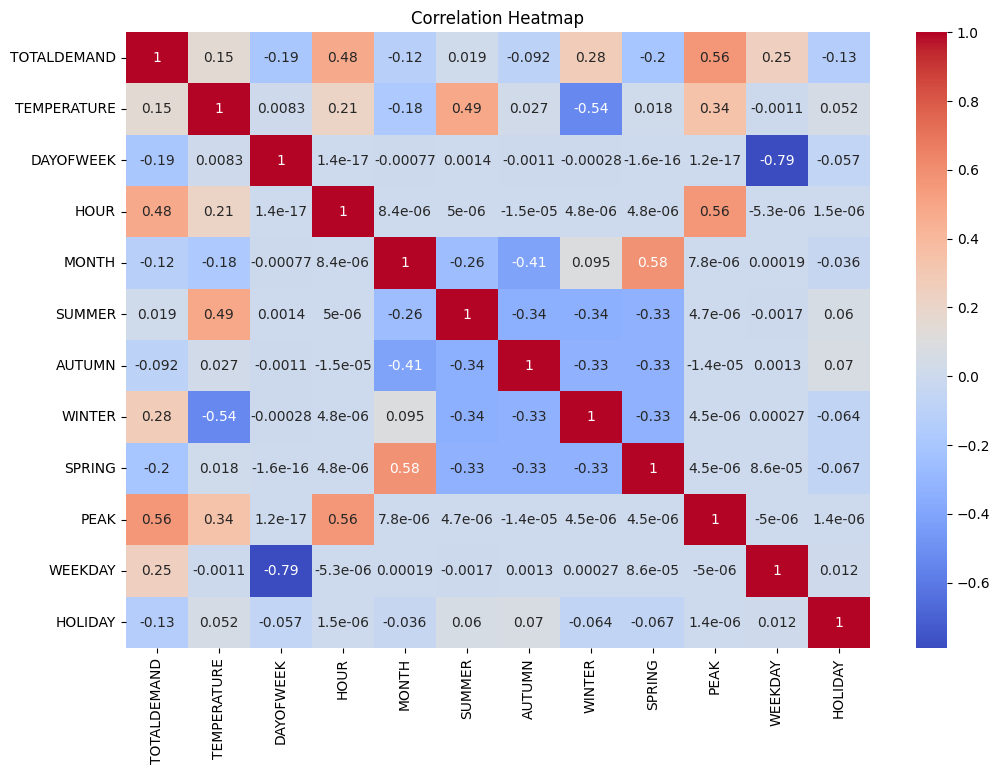

In [166]:
#heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(final_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Export the final data

In [167]:
#export the final_data to a csv file
final_data.to_csv('../data/final_data_2010_2021.csv')